# Mnist 분류

In [1]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
# tranforms : 이미지를 불러올때 전처리 해줌
from torchvision.transforms import ToTensor
# 데이터를 섞거나, 배치단위로 분류 등
from torch.utils.data.dataloader import DataLoader
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [2]:
# train=True : 학습용 데이터를 불러와라
# transform : 전처리
train_data = MNIST(root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_mnist/',train=True,download=True,transform=ToTensor())
test_data = MNIST(root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_mnist/',train=False,download=True,transform=ToTensor())

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_mnist/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
# transform=ToTensor로 썼기 때문에 tensor로 받음
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [5]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [6]:
test_data.targets , test_data.targets.size()

(tensor([7, 2, 1,  ..., 4, 5, 6]), torch.Size([10000]))

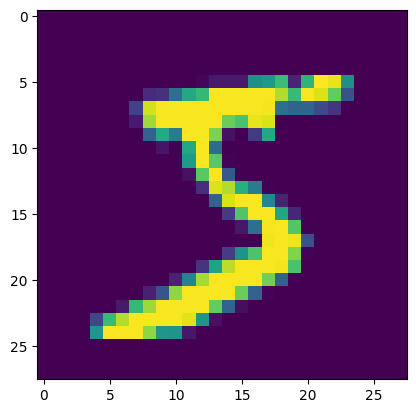

In [7]:
plt.imshow(train_data.data[0])

In [8]:
train_data.targets[0]

tensor(5)

# DataLoader

In [9]:
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

In [10]:
# 한개씩 뽑아오기
# 이미지와 클래스값 둘다 뽑아옴
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [18]:
data, label = next(iter(train_loader))
data[0], label[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           1.0000, 0.7059, 0.0000, 0.0000, 

In [11]:
# tf는 알아서 GPU 써줌
# Colab은 설정만 해주면 써줌
# torch는 GPU에 직접 얹어야함

In [13]:
# device 변수에 cuda를 사용 유무 저장
# Colab 기준 설정 바꿔주면 cpu => cuda 로 바뀜
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# 모델만들기

In [14]:
model = nn.Sequential(
    # 입력 : 28x28,
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
    # 마지막 softmax 필요없이
    # loss 에서 처리해줌 (logsoftmax가 처리해줌)

)

# 모델을 cpu or gpu에 얹음
model.to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [17]:
# 0 == gpu
next(model.parameters()).get_device()

0

In [20]:
lr = 1e-3
optim = Adam(model.parameters(),lr=lr)
epochs = 20

for epoch in range(epochs):
  # DataLoader에서 데이터,라벨 뽑아오기
  for data,label in train_loader:
    optim.zero_grad()
    pred = model(data)

    # 다중 분류 : CrossEntropyLoss
    # 현재 pred는 GPU , label은 CPU에 있음
    # label을 GPU로
    loss = nn.CrossEntropyLoss()(pred,label.to(device))
    loss.backward()

RuntimeError: ignored

# 오류 : data는 cuda, label은 CPU에 있음 ==> pred = model(data.to(device))

In [21]:
lr = 1e-3
optim = Adam(model.parameters(),lr=lr)
epochs = 20

for epoch in range(epochs):
  # DataLoader에서 데이터,라벨 뽑아오기
  for data,label in train_loader:
    optim.zero_grad()
    pred = model(data.to(device))

    # 다중 분류 : CrossEntropyLoss
    # 현재 pred는 GPU , label은 CPU에 있음
    # label을 GPU로
    loss = nn.CrossEntropyLoss()(pred,label.to(device))
    loss.backward()

RuntimeError: ignored

# 오류 : shape이 맞지 않음 ==> data = torch.reshape(data,(-1,784))

In [24]:
lr = 1e-3
optim = Adam(model.parameters(),lr=lr)
epochs = 20

for epoch in range(epochs):
  # DataLoader에서 데이터,라벨 뽑아오기
  for data,label in train_loader:
    optim.zero_grad()

    # 데이터를 28x28 = 784 로 맞춰줌
    data = torch.reshape(data,(-1,784))
    pred = model(data.to(device))

    # 다중 분류 : CrossEntropyLoss
    # 현재 pred는 GPU , label은 CPU에 있음
    # label을 GPU로
    loss = nn.CrossEntropyLoss()(pred,label.to(device))
    loss.backward()
    optim.step()

  print(f'{epoch+1} loss : {loss.item()}')

1 loss : 0.044629666954278946
2 loss : 0.03547966107726097
3 loss : 0.1387159526348114
4 loss : 0.02901027351617813
5 loss : 0.006724115926772356
6 loss : 0.02646060660481453
7 loss : 0.014899665489792824
8 loss : 0.03216098994016647
9 loss : 0.0012880414724349976
10 loss : 0.025196649134159088
11 loss : 0.0012080779997631907
12 loss : 0.024079451337456703
13 loss : 0.029130613431334496
14 loss : 0.0019697071984410286
15 loss : 0.10695865005254745
16 loss : 0.00011287141387583688
17 loss : 0.0010002226335927844
18 loss : 0.014621025882661343
19 loss : 0.00018968401127494872
20 loss : 0.04418708011507988


# 학습 중간에 검증할 때

In [25]:
# torch는 검증코드를 따로 짜주어야함

# 검증 시 2가지 주의 사항
# 1. model.eval() 함수(검증 모드) : dropout() , batch_normalize() 함수 제거
# <->
# 2. model.train (학습 모드)

In [42]:
model.eval()

total_corr = 0

# 학습하면서 미분값을 저장하고 있음 : Autograd
# 검증 시에는 이 과정을 끊음 => no_grad()
with torch.no_grad():

  # 배치 단위로 돔
  for data,label in test_loader:
    data = torch.reshape(data,(-1,784)).to(device)
    pred = model(data)

    # softmax 값중에서 가장 큰값
    # numpy argmax 와 유사
    preds = pred.data.max(1)[1]

    # 예측값과 실제값이 같을때의 갯수 sum
    corr = preds.eq(label.to(device)).sum().item()
    print(corr)

    total_corr += corr

  # 전체 데이터 갯수에서 맞은 갯수 (%)
  print(total_corr/len(test_data))

31
32
32
31
30
32
32
31
32
31
31
32
32
31
31
31
32
32
30
32
31
30
31
32
32
32
31
31
31
30
31
31
31
32
31
32
30
31
26
32
30
30
31
31
32
32
31
29
30
31
29
32
30
31
29
30
31
31
31
31
30
32
29
28
30
29
29
31
31
31
32
30
31
32
29
30
32
31
32
32
31
28
31
32
32
31
32
32
32
31
31
28
31
32
32
31
31
31
32
32
31
32
32
32
31
32
31
32
32
31
31
28
31
32
31
31
31
29
29
30
30
31
31
30
32
31
32
29
30
28
31
30
30
32
30
32
32
32
31
32
30
31
31
32
32
32
32
32
30
32
29
32
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
31
31
32
32
32
31
32
30
31
32
30
32
32
31
30
31
31
30
32
32
31
32
32
31
32
32
32
32
32
32
32
31
32
32
32
30
30
30
31
32
32
31
31
32
30
32
32
32
32
32
32
32
32
32
32
32
31
31
32
32
32
32
32
30
32
32
32
32
32
32
32
32
32
32
32
32
32
31
31
32
32
32
30
32
32
32
31
32
32
31
31
31
31
32
32
32
32
29
32
32
32
32
32
32
32
32
32
32
32
32
32
32
29
31
32
32
32
32
31
32
32
31
32
32
32
31
32
32
31
32
31
32
31
30
30
29
29
31
31
32
31
31
31
16
0.9765


# tensor.max() 란?

In [26]:
test = torch.tensor([[1,2,3,],[1,3,2]])
test.size()

torch.Size([2, 3])

In [28]:
test.max(1)
# [0] == > value
# [1] == > idx

torch.return_types.max(
values=tensor([3, 3]),
indices=tensor([2, 1]))

In [29]:
test.max(1)[0], test.max(1)[1]

(tensor([3, 3]), tensor([2, 1]))

# 모델 저장

In [37]:
# 1. 모델 자체 저장
torch.save(model,'/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_mnist/model.pth')

In [38]:
model_new = torch.load('/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/pytorch_mnist/model.pth')

# 모델 로드

In [50]:
model_new(torch.reshape(test_data.data[0].to(device),(-1,28,28)))

RuntimeError: ignored

In [43]:
# 2. 가중치만 저장 (권장)